<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [29]:
# Import the Required Packages

#Basic python packages
import numpy as np
import pandas as pd
import nltk
import re
import string

#loading and preprocessing data
import tensorflow.keras
import os, shutil
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

#model making
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

#optimizers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

#regularizer
from tensorflow.keras import regularizers

#testing
from tensorflow.keras.models import load_model

## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [30]:
#Sets base direcetory as the current directory
base_dir = os.getcwd() 

#path to reveiw data
reviews_dir = 'macdonalds_reviews.csv' #Set the reviews directory from loading the data reviews

#Extracts csv information and puts it in a dataframe
reviews = pd.read_csv(reviews_dir, encoding="utf8")
#https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/import-csv-files-pandas-dataframes/


In [12]:
#print out reviews
reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGPq-8LyHiMTNXU216EeMbZv0vbeUrcLNKQuSr...,Harith Bolhi,https://play-lh.googleusercontent.com/a-/AOh14...,Slow gila management,1,0,2.23.1,2021-07-11 14:08:26,NaN,NaN
1,gp:AOqpTOHrGSZxs32JpFDMuY1zjZ4oTqyGJU_9kS2r4ZN...,ahmad gouda,https://play-lh.googleusercontent.com/a-/AOh14...,Bad app,1,0,NaN,2021-07-11 12:36:06,NaN,NaN
2,gp:AOqpTOFgvhDSTrHxsa95OR_-gMKIbQPArQpFLnBYQfH...,Iwan Langitan,https://play-lh.googleusercontent.com/a-/AOh14...,Otp code never receive bad...,1,0,NaN,2021-07-11 12:12:44,NaN,NaN
3,gp:AOqpTOFt54B_DiDLR2BZt72Zg-iE2e5trTFWcCp3ahu...,muhamad faez,https://play-lh.googleusercontent.com/a-/AOh14...,Stupid app...say my device did not pass securi...,1,0,2.23.1,2021-07-11 10:19:40,NaN,NaN
4,gp:AOqpTOGmQzwBWWYh6ov5Lgxwpfxob21m2E0674WFJeS...,DJ KNOXX SA,https://play-lh.googleusercontent.com/a-/AOh14...,The app is not working and wants an update jus...,1,0,2.23.1,2021-07-11 09:44:01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
100029,gp:AOqpTOEN3m_Ytja3dRXCie-eAZMPOUsWla501__tg__...,Remi Mesut,https://play-lh.googleusercontent.com/a-/AOh14...,Nedense şubeye gidince çalışmıyor ...,1,0,2.5.4,2020-06-12 03:12:04,NaN,NaN
100030,gp:AOqpTOEwSBYSeWSqfuOwBNgMhLJpi3xMK4Nkyd7sV73...,nidhin thomas,https://play-lh.googleusercontent.com/a-/AOh14...,Good :),5,0,2.5.3,2020-06-12 01:59:34,NaN,NaN
100031,gp:AOqpTOEWX_17hzmzkUU4XRD9sb_ybOYerk-g9kvfiCV...,Bahaa Abdeen,https://play-lh.googleusercontent.com/a/AATXAJ...,خدمة العملاء سيئة جداً جداً,1,0,2.5.4,2020-06-12 00:55:53,NaN,NaN
100032,gp:AOqpTOFymEEpfl7bkpIO3eehU48rnnrHVWFqhGukfvA...,SirajMunir,https://play-lh.googleusercontent.com/a-/AOh14...,McDonald's Tq,5,0,2.5.4,2020-06-12 00:34:55,NaN,NaN


In [31]:
#put content into a list
content = reviews.iloc[:,3].tolist()

#put score into a list
score = reviews.iloc[:,4].tolist()

#https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6
#https://cmdlinetips.com/2020/04/how-to-get-column-names-as-list-in-pandas/

### 1.2 Data Processing


In [32]:
#check for Nan in data
for i in content:
    if isinstance (i, str) == False:
        print(i)
        print(type(i))

nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>


In [33]:
#grab content and score from dataframe
reviews = reviews.loc[:,['content','score']]
#drop all Nan in data
reviews.dropna(inplace=True)

In [16]:
reviews

,content,score
0,Slow gila management,1
1,Bad app,1
2,Otp code never receive bad...,1
3,Stupid app...say my device did not pass securi...,1
4,The app is not working and wants an update jus...,1
...,...,...
100029,Nedense şubeye gidince çalışmıyor ...,1
100030,Good :),5
100031,خدمة العملاء سيئة جداً جداً,1
100032,McDonald's Tq,5


In [34]:
#retive content and score from new dataframe 
content = reviews.iloc[:,0].tolist()
score = reviews.iloc[:,1].tolist()

#prints all unique characters in the content
content_items = ""
for item in content:
    content_items += item+" "
unique_characters = sorted(list(set(content_items)))
print(unique_characters)

['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '£', '§', '®', '°', '²', '¿', 'Á', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Í', 'Î', 'Ö', '×', 'Ú', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'ü', 'ý', 'Ā', 'ā', 'ă', 'ą', 'ć', 'Č', 'č', 'ď', 'Đ', 'đ', 'Ē', 'ē', 'ė', 'ę', 'ě', 'ğ', 'Ī', 'ī', 'į', 'İ', 'ı', 'ķ', 'ĺ', 'ł', 'ń', 'ņ', 'Ő', 'ő', 'ř', 'ś', 'Ş', 'ş', 'Š', 'š', 'ť', 'ũ', 'ū', 'ů', 'ű', 'ų', 'ź', 'Ż', 'ż', 'Ž', 'ž', 'Ə', 'ơ', 'ư', 'ș', 'ț', 'ə', 'ʖ', 'Έ', 'Α', 'Ε

In [35]:
#function to preprocess data
def pre_process(text):
    
    # lowercase
    lower_text=text.lower()
    
    #remove most odd characters
    half_clean = lower_text.encode("ascii","ignore").decode()
    
    #remove special characters and digits
    nopunct_text=re.sub("(\\d|\\W|_)+"," ", half_clean)
    
    
    #return cleaned data
    return nopunct_text

In [36]:
cleaned_reviews = pd.DataFrame()

#run data through pre_process
cleaned_reviews["content"] = reviews["content"].apply(lambda x:pre_process(x))

#convert dataframe into a list
cleaned_reviews_list = cleaned_reviews["content"].tolist()

In [20]:
cleaned_reviews_list

['slow gila management',
 'bad app',
 'otp code never receive bad ',
 'stupid app say my device did not pass security check my redmi is stock phone and your staff say the promotion meal only can buy thru app so how',
 'the app is not working and wants an update just after i downloaded it ',
 'too slow ',
 'absolutely useless app to order from the staff at the counters have no idea how to drive them nor help a customer they stick with the line what ever is on the app you get the same even if i would like to upgrade paying a price i get the standard line repeated to me lovely customer service ain t it i guess i can say i ain t loving it ',
 'worst app experience the staff themselves doesn t know how the app works ',
 'my favorite food',
 'lovely one',
 'hug',
 'amazing',
 ' ',
 'good ',
 'mc do doesn t reward all points you deserve',
 'iggh',
 'awesome ',
 'excellent',
 'not able to downlaod update',
 'they should just reconsider this app is useless it never works always says something w

In [37]:
final_cleaned_reviews_list = []
final_score = []

for i in range(len(cleaned_reviews_list)):
    # if review is not empty
    if cleaned_reviews_list[i] != "":
        #if review has words
        if cleaned_reviews_list[i].isspace() == False:
            #add to content to new list
            final_cleaned_reviews_list += [cleaned_reviews_list[i]]
            #add to content's corresponding score to new list
            final_score += [score[i]]

In [38]:
content_cleaned_final = pd.DataFrame()
content_cleaned_final["content"] = final_cleaned_reviews_list
content_cleaned_final["score"] = final_score

In [14]:
content_cleaned_final.head(20)

,content,score
0,slow gila management,1
1,bad app,1
2,otp code never receive bad,1
3,stupid app say my device did not pass security...,1
4,the app is not working and wants an update jus...,1
5,too slow,1
6,absolutely useless app to order from the staff...,1
7,worst app experience the staff themselves does...,1
8,my favorite food,5
9,lovely one,5


In [39]:
#Checking to see if cleaned content has no more invalid characters
unique_characters_final = ""

for item in final_cleaned_reviews_list:
    unique_characters_final += item+" "
unique_characters_final = sorted(list(set(unique_characters_final)))
print(unique_characters_final)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### 1.3 Data Sampling

In [40]:
# Convert the content and scores into numeric tensors

# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
#80% train samples, 20% test samples
X_train, X_test, y_train, y_test = train_test_split(final_cleaned_reviews_list, final_score, test_size=0.2)
maxlen = 20  

#Rank the words based on popularity, more words has a smaller index
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(X_train)

#Converting the training reviews to numbers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
#Converting the training test reviews to number
X_test_sequences = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index #Each word map to an index; learnt through text data
print('Found %s unique tokens.' % len(word_index))

#Make reviews have a uniform length
X_train_padded_sequences = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded_sequences = pad_sequences(X_test_sequences, maxlen=maxlen)
print('Shape of X_train tensor:', X_train_padded_sequences.shape)
print('Shape of X_test tensor:', X_test_padded_sequences.shape)

#convert y data into numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

#Converting integers in y_train and y_test to binary class matrix
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Found 20365 unique tokens.
Shape of X_train tensor: (76784, 20)
Shape of X_test tensor: (19196, 20)
Shape of y_train: (76784, 6)
Shape of y_test: (19196, 6)


In [41]:
#check sample data
print(X_test[:5])
print(X_train[:5])
print(y_train[:5])
print(y_test[:5])

['good', 'thank you mcdonalds for the very good quality food', 'app doesn t go beyond choose country screen d', 'no puedo usar mi cuenta me obliga a registrarme de nuevo a traves de otra aplicacin me intento registrar y no puedo porque mi email est en uso muy bien campeones ', 'the main issue for me while using mcd app my is that the promotion is actually not available in all branches in west malaysia my order is only be informed get rejected during the riuh promotion is still on going while i went to drive thru it is more efficiency to show all available branches lastly one receipt can only accept one order using mcd app by drive thru that s soooooo troublesome so what s the concept of drive thru haiyaaaaa']
['discount meal', 'when you try to open the app it s a blank white screen and you have to keep reinstall the app in order to work due to many times you require to download', 'farig', 'bad', 'i would like to say that the service is suck i claim a rm burger at the aman central mc do

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1  (Student Name: XXXX)

In [42]:
# Build the Model
model = Sequential()
#model.add(Embedding(len(word_index)+1, 64))
model.add(Embedding(len(word_index)+1, 32))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(SimpleRNN(64, recurrent_dropout = 0.1))
model.add(layers.Dropout(0.1))
model.add(Dense(6, kernel_regularizer=regularizers.l2(0.1), activation='softmax'))

  

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          651712    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 64)          6208      
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 64)          8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 64)         

In [19]:
# Train the Model
#optimizer = optimizers.RMSprop(lr=0.005)
#optimizer = optimizers.Adam(lr=0.01)
optimizer = optimizers.SGD(lr=0.01)

model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_padded_sequences, y_train,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.2)


Train on 61427 samples, validate on 15357 samples
Epoch 1/40
61427/61427 [==============================] - 325s 5ms/sample - loss: 1.1866 - acc: 0.6414 - val_loss: 1.0002 - val_acc: 0.6702
Epoch 2/40
61427/61427 [==============================] - 243s 4ms/sample - loss: 0.9821 - acc: 0.6868 - val_loss: 0.8867 - val_acc: 0.7401
Epoch 3/40
61427/61427 [==============================] - 195s 3ms/sample - loss: 0.8504 - acc: 0.7578 - val_loss: 0.8386 - val_acc: 0.7612
Epoch 4/40
61427/61427 [==============================] - 184s 3ms/sample - loss: 0.7853 - acc: 0.7860 - val_loss: 0.7436 - val_acc: 0.8047
Epoch 5/40
61427/61427 [==============================] - 194s 3ms/sample - loss: 0.7480 - acc: 0.7997 - val_loss: 0.7223 - val_acc: 0.8112
Epoch 6/40
61427/61427 [==============================] - 176s 3ms/sample - loss: 0.7263 - acc: 0.8077 - val_loss: 0.7605 - val_acc: 0.7920
Epoch 7/40
61427/61427 [==============================] - 180s 3ms/sample - loss: 0.7186 - acc: 0.8109 - val_l

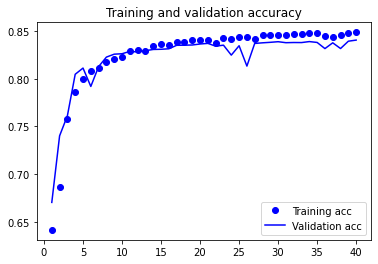

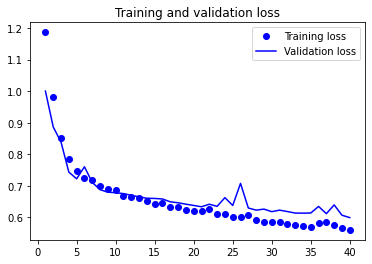

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
# Plot the Training and Validation Accuracy & Loss Scores

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Save the Model
model.save('text_model_edward.h5')

### Model #2  (Student Name: XXXX)

In [22]:
# Build the Model - Baseline


In [23]:
# Train the Model


In [24]:
# Plot the Training and Validation Accuracy & Loss Scores


In [25]:
# Save the Model
model.save('text_model_2.h5')

### Model #3  (Student Name: XXXX)

In [26]:
# Build the Model


In [27]:
# Train the Model


In [28]:
# Plot the Training and Validation Accuracy & Loss Scores


In [29]:
# Save the Model
model.save('text_model_3.h5')

### Model #4  (Student Name: XXXX)

In [30]:
# Build the Model


In [31]:
# Train the Model


In [32]:
# Plot the Training and Validation Accuracy & Loss Scores


In [33]:
# Save the Model
model.save('text_model_4.h5')

### Model #5  (Student Name: XXXX)

In [34]:
# Build the Model


In [35]:
# Train the Model


In [36]:
# Plot the Training and Validation Accuracy & Loss Scores


In [37]:
# Save the Model
model.save('text_model_5.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [43]:
# Model #1 (replicate where necessary for other models)
model.load_weights('text_model_1.h5')
test_acc,test_loss = model.evaluate(X_test_padded_sequences,y_test, batch_size = 128)

ValueError: Shapes (20366, 32) and (20307, 32) are incompatible

In [39]:
# Model #2 (replicate where necessary for other models)
model.load_weights('text_model_2.h5')


In [40]:
# Model #3 (replicate where necessary for other models)
model.load_weights('text_model_3.h5')


In [41]:
# Model #4 (replicate where necessary for other models)
model.load_weights('text_model_4.h5')


In [42]:
# Model #5 (replicate where necessary for other models)
model.load_weights('text_model_5.h5')


In [43]:
# Save the Best Model
model.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [44]:
model.load_weights('text_model_best.h5')

In [45]:
# convert the user input into numeric tensor


In [46]:
# show the model output using predict function

